## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [70]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [71]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [1]:
import pandas as pd

In [3]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [7]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
3407,😃,5,1,smile,positive/negative,0,риверейд и мунти детство😃
6705,🤡,2,1,no_emotion,positive/negative,3,bruh 🤡
6447,😃,8,1,smile,positive/negative,0,по этому в туалет девочки ходят вдвоем 😃
6854,🤣,2,1,smile,positive/negative,0,ахах🤣
7713,😂,11,1,smile,positive/negative,0,после этого видео у всех полисменов в комплект...
...,...,...,...,...,...,...,...
8377,🤣,6,1,smile,positive/negative,0,зато избавилась чтоб не целоваться🤣
234,😅,6,1,smile,positive/negative,0,это должна быть жизненная цель😅
69,😂,7,1,smile,positive/negative,0,"плюсани, если помнишь этих ребят! 😂"
8650,😃,9,1,smile,positive/negative,0,ему просто не о чем с ней поговорить😃


Выделяем данные для обучения

In [77]:
posts = train['clean_text']

In [78]:
posts[:5]

7152                                   кому как нравится🤣
2421                    поттер со всеми за одним столом 😄
766     через 4 дня перестанет работать приложение zen...
193     две близняшки тоже родили близняшек, они же со...
6825                                            😆не надо!
Name: clean_text, dtype: object

Выделяем правильные ответы

In [79]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [80]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [82]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [83]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [84]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'что': 6,
 'я': 7,
 'это': 8,
 'на': 9,
 '😂': 10,
 '😁': 11,
 'так': 12,
 'с': 13,
 'у': 14,
 'как': 15,
 '😅': 16,
 'то': 17,
 'ты': 18,
 'ну': 19,
 '🤔': 20,
 '😄': 21,
 'же': 22,
 'да': 23,
 'вот': 24,
 'все': 25,
 'за': 26,
 'вы': 27,
 '😊': 28,
 'уже': 29,
 '😉': 30,
 'тоже': 31,
 'по': 32,
 '😆': 33,
 'мне': 34,
 '😏': 35,
 'он': 36,
 'когда': 37,
 'меня': 38,
 'бы': 39,
 'просто': 40,
 'из': 41,
 'только': 42,
 'есть': 43,
 'она': 44,
 'для': 45,
 'если': 46,
 '😍': 47,
 'спасибо': 48,
 'они': 49,
 '😃': 50,
 'ещё': 51,
 'там': 52,
 'кто': 53,
 'от': 54,
 'нет': 55,
 'но': 56,
 'очень': 57,
 '😎': 58,
 'к': 59,
 'надо': 60,
 'всё': 61,
 'без': 62,
 'было': 63,
 '😳': 64,
 'даже': 65,
 'будет': 66,
 '❤': 67,
 'можно': 68,
 'может': 69,
 'или': 70,
 'тебе': 71,
 'до': 72,
 'тебя': 73,
 'тут': 74,
 'вас': 75,
 'о': 76,
 'где': 77,
 'какой': 78,
 'его': 79,
 'лучше': 80,
 'точно': 81,
 'вообще': 82,
 'вам': 83,
 'этот': 84,
 'такой': 85,
 'тогда': 

Преобразуем посты в числовое представление

In [85]:
sequences = tokenizer.texts_to_sequences(posts)

In [86]:
index = 100
print(posts[index])
print(sequences[index])

❤, если здесь не хватает коли
[617, 18, 233, 4]


In [87]:
tokenizer.word_index['здесь']

178

Ограничиваем длину постов

In [88]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [89]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,  193,   15, 1671],
       [   0,    0,    0,    0, 1672,  137, 1673,   26,  885, 3087,   21],
       [   0,  208,  322,  430, 1674,  534,  727, 1144, 1145, 1146,  209],
       [   0,    0,  359, 3088,   31, 3089, 3090,   49,   22,  252, 3091],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3092,   60]],
      dtype=int32)

## Сверточная нейронная сеть

In [90]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [91]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [92]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 11, 32)            320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [93]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [94]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=10,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 1.7109 - accuracy: 0.6309
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_cnn.h5
52/52 [==============================] - 8s 124ms/step - loss: 1.7109 - accuracy: 0.6309 - val_loss: 1.3114 - val_accuracy: 0.6599
Epoch 2/10
48/52 [==========================>...] - ETA: 0s - loss: 1.2143 - accuracy: 0.6497
Epoch 2: val_accuracy improved from 0.65989 to 0.71545, saving model to best_model_cnn.h5
52/52 [==============================] - 3s 54ms/step - loss: 1.2057 - accuracy: 0.6532 - val_loss: 1.0344 - val_accuracy: 0.7154
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.8625 - accuracy: 0.7186
Epoch 3: val_accuracy did not improve from 0.71545
52/52 [==============================] - 2s 46ms/step - loss: 0.8625 - accuracy: 0.7186 - val_loss: 1.0252 - val_accuracy: 0.7046
Epoch 4/10
47/52 [==========================>...] - ETA: 0s - loss: 0.6624 - accuracy: 0.7896
Epoch

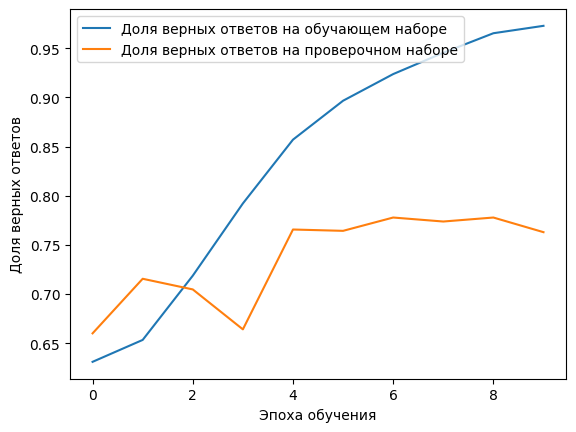

In [95]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [96]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [97]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [98]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_6 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [99]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [100]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 2.4315 - accuracy: 0.5931
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_lstm.h5
52/52 [==============================] - 9s 123ms/step - loss: 2.4315 - accuracy: 0.5931 - val_loss: 1.6390 - val_accuracy: 0.6599
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.4253 - accuracy: 0.6389
Epoch 2: val_accuracy did not improve from 0.65989
52/52 [==============================] - 3s 62ms/step - loss: 1.4253 - accuracy: 0.6389 - val_loss: 1.2826 - val_accuracy: 0.6599
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 1.2880 - accuracy: 0.6389
Epoch 3: val_accuracy did not improve from 0.65989
52/52 [==============================] - 2s 40ms/step - loss: 1.2880 - accuracy: 0.6389 - val_loss: 1.1859 - val_accuracy: 0.6599
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 1.1503 - accuracy: 0.6389
Epoch 4: val_accuracy did not improve from 

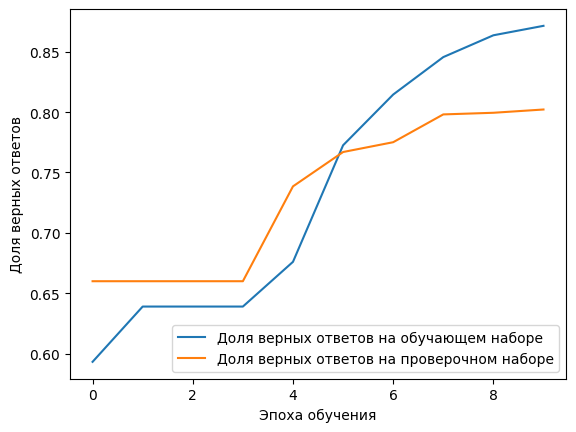

In [101]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [102]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [103]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [104]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru_1 (GRU)                 (None, 16)                2400      
                                                                 
 dense_7 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [105]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [106]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 2.3666 - accuracy: 0.5972
Epoch 1: val_accuracy improved from -inf to 0.65989, saving model to best_model_gru.h5
52/52 [==============================] - 7s 93ms/step - loss: 2.3666 - accuracy: 0.5972 - val_loss: 1.5390 - val_accuracy: 0.6599
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 1.3514 - accuracy: 0.6389
Epoch 2: val_accuracy did not improve from 0.65989
52/52 [==============================] - 3s 66ms/step - loss: 1.3514 - accuracy: 0.6389 - val_loss: 1.1902 - val_accuracy: 0.6599
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 1.1195 - accuracy: 0.6684
Epoch 3: val_accuracy improved from 0.65989 to 0.71274, saving model to best_model_gru.h5
52/52 [==============================] - 3s 57ms/step - loss: 1.1195 - accuracy: 0.6684 - val_loss: 1.0168 - val_accuracy: 0.7127
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.9055 - accuracy: 0.7202
Epoch 

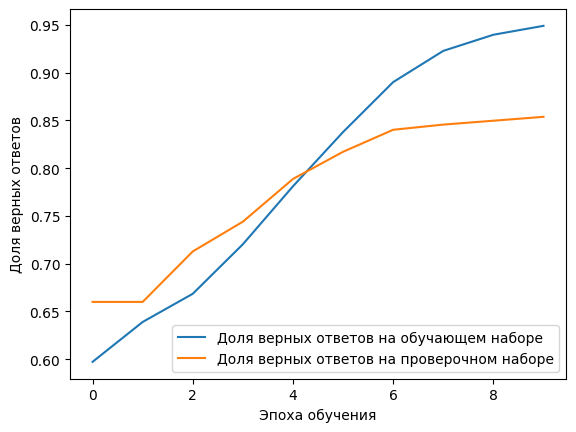

In [107]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [8]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
4700,🤣,7,1,smile,positive/negative,0,а. ну либо так тогда 🤣
3422,😉,4,1,smile,positive/negative,0,само собой. 😉
7000,😄,8,1,smile,positive/negative,0,где срез у рулона там и грызёт 😄
3308,😂,8,1,smile,positive/negative,0,а ты смотрел этот фильм хохлоnuдор?😂
5962,🤣,6,1,smile,positive/negative,0,"и было бы, убийства ёлки 🤣"
...,...,...,...,...,...,...,...
5198,😄,6,1,smile,positive/negative,0,аааа ааа это запрещены приём 😄
5606,😁,10,1,smile,positive/negative,0,"это как запретить самогон, но не запретить вод..."
5813,😏,10,1,no_emotion,neutral/skeptical,1,она же гот. могла по сценарию просто вскрыться😏
4683,😆,9,1,smile,positive/negative,0,эта функция называтся - частная/закрытая группа 😆


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [109]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [110]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [111]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    2,   53,   85,  703, 2403,   20],
       [   0,    0,    0,    0,    0,    0,    0,    0,   36,  457,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   31,  576,    6,   14,  422, 4596,    3,   21],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  387, 3118]],
      dtype=int32)

Правильные ответы

In [112]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [113]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [114]:
model_cnn.load_weights(model_cnn_save_path)

In [115]:
model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 4ms/step - loss: 0.9090 - accuracy: 0.7858


[0.9090262651443481, 0.7857917547225952]

### Сеть LSTM

In [116]:
model_lstm.load_weights(model_lstm_save_path)

In [117]:
model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.7533 - accuracy: 0.8129


[0.7533202767372131, 0.8129067420959473]

### Сеть GRU

In [118]:
model_gru.load_weights(model_gru_save_path)

In [119]:
model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.8547


[0.6353318691253662, 0.8546637892723083]

In [123]:
#test['clean_text'][592]
test['clean_text'][4445]

'просто некоторые не умеют не завидовать чужим победам😩'

In [124]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][4445], test['emotion'][4445], test['tonality'][4445]

(4, 'sadness', 'negative')

In [125]:
#text = test['clean_text'][2384]
text = test['clean_text'][4445]

In [126]:
sequence = tokenizer.texts_to_sequences([text])

In [127]:
sequence

[[40, 824, 1, 989, 1, 2156]]

In [128]:
data = pad_sequences(sequence, maxlen=max_len)

In [129]:
data

array([[   0,    0,    0,    0,    0,   40,  824,    1,  989,    1, 2156]],
      dtype=int32)

In [130]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [131]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 61ms/step


In [132]:
result_cnn

array([[0.02746288, 0.03763811, 0.01721787, 0.02459993, 0.5551518 ,
        0.07605059, 0.01504344, 0.1221821 , 0.04031283, 0.02640986,
        0.00983778, 0.03210732, 0.00935098, 0.00517213, 0.00146233]],
      dtype=float32)

### Сеть LSTM

In [135]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 0s 26ms/step


In [136]:
result_lstm

array([[0.7615842 , 0.10388136, 0.04138035, 0.01856916, 0.04741895,
        0.00608752, 0.00283398, 0.00183686, 0.00396073, 0.00342135,
        0.00168338, 0.00300559, 0.00200301, 0.00104891, 0.00128464]],
      dtype=float32)

### Сеть GRU

In [138]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 37ms/step


In [139]:
result_gru

array([[8.2825750e-01, 7.0644006e-02, 4.0494546e-02, 3.4141596e-02,
        1.0559557e-02, 3.3345702e-03, 1.5545513e-03, 3.5435383e-03,
        6.8408379e-04, 1.1248123e-03, 1.0468543e-03, 1.1699662e-03,
        1.2004093e-03, 1.1599186e-03, 1.0840507e-03]], dtype=float32)